
# **SKLEARN EXERCISES**


In this practice, the development of classifiers begins with selecting a classification dataset from the UCI Machine Learning Repository: https://archive.ics.uci.edu/. For simplicity and due to the lack of restrictions, the "Iris" dataset will be used in this work. This classic dataset, dating back to Fisher's 1936 paper, is a small and well-known dataset commonly used to evaluate classification methods. Given its widespread use and familiarity, it offers a valuable learning experience.

Code to download, clean and prepare data before starting to use sklearn

In [ ]:
pip install ucimlrepo #in the python console use: "pip install ucimlrepo"

In [ ]:

from ucimlrepo import fetch_ucirepo

# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
features = iris.data.features #4 features: sepal length, sepal width, petal length and petal width
print("Features: \n ", features)
targets = iris.data.targets  #3 classes: Iris Setosa, Iris Versicolor and Iris Virginica
print("Targets (classes): \n", targets)

'''
#Other information that may be of interest
print(iris.metadata)   #metadata
print(iris.variables) #variable information  (cm in this case)
'''

Features: 
       sepal length  sepal width  petal length  petal width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
Targets (classes): 
               class
0       Iris-setosa
1       Iris-setosa
2       Iris-setosa
3       Iris-setosa
4       Iris-setosa
..              ...
145  Iris-virginica
146  Iris-virginica
147  Iris-virginica
148  Iris-virginica
149  Iris-virginica

[150 

'\n#Other information that may be of interest\nprint(iris.metadata)   #metadata\nprint(iris.variables) #variable information  (cm in this case)\n'

If you want to use a database downloaded through Panda you can do it this way:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iris.data') #direccion de TU csv, hay files de ejemplo en mi github

Mounted at /content/drive


In [ ]:
print(df)

     5.1  3.5  1.4  0.2     Iris-setosa
0    4.9  3.0  1.4  0.2     Iris-setosa
1    4.7  3.2  1.3  0.2     Iris-setosa
2    4.6  3.1  1.5  0.2     Iris-setosa
3    5.0  3.6  1.4  0.2     Iris-setosa
4    5.4  3.9  1.7  0.4     Iris-setosa
..   ...  ...  ...  ...             ...
144  6.7  3.0  5.2  2.3  Iris-virginica
145  6.3  2.5  5.0  1.9  Iris-virginica
146  6.5  3.0  5.2  2.0  Iris-virginica
147  6.2  3.4  5.4  2.3  Iris-virginica
148  5.9  3.0  5.1  1.8  Iris-virginica

[149 rows x 5 columns]


**Exercise 1:**  Classify the data with a Naïve Bayes classifier: https://scikit-learn.org/stable/modules/naive_bayes.html

Libraries that needed to be called

In [ ]:
from ucimlrepo import fetch_ucirepo #if you doesnt have de iris.data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


Prepare the data for the model

In [ ]:
label_encoder = LabelEncoder()
for column in df.select_dtypes(include='object').columns:
    df[column] = label_encoder.fit_transform(df[column])
    features = df.drop('Iris-setosa', axis=1) #print(df.columns)
targets = df['Iris-setosa']
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, targets,
test_size=0.15, random_state=50)

Features:

In [ ]:
print("X_train: \n ", X_train)
print("X_test: \n ", X_test)

X_train: 
       5.1  3.5  1.4  0.2
73   6.4  2.9  4.3  1.3
98   5.7  2.8  4.1  1.3
83   5.4  3.0  4.5  1.5
116  7.7  3.8  6.7  2.2
89   5.5  2.6  4.4  1.2
..   ...  ...  ...  ...
70   6.1  2.8  4.0  1.3
132  6.3  2.8  5.1  1.5
33   4.9  3.1  1.5  0.1
109  6.5  3.2  5.1  2.0
139  6.7  3.1  5.6  2.4

[126 rows x 4 columns]
X_test: 
       5.1  3.5  1.4  0.2
63   5.6  2.9  3.6  1.3
86   6.3  2.3  4.4  1.3
57   6.6  2.9  4.6  1.3
25   5.0  3.4  1.6  0.4
110  6.4  2.7  5.3  1.9
16   5.1  3.5  1.4  0.3
136  6.4  3.1  5.5  1.8
23   4.8  3.4  1.9  0.2
120  5.6  2.8  4.9  2.0
12   4.3  3.0  1.1  0.1
147  6.2  3.4  5.4  2.3
56   4.9  2.4  3.3  1.0
59   5.0  2.0  3.5  1.0
122  6.3  2.7  4.9  1.8
20   5.1  3.7  1.5  0.4
137  6.0  3.0  4.8  1.8
104  7.6  3.0  6.6  2.1
80   5.5  2.4  3.7  1.0
78   5.7  2.6  3.5  1.0
131  6.4  2.8  5.6  2.2
146  6.5  3.0  5.2  2.0
14   5.7  4.4  1.5  0.4
84   6.0  3.4  4.5  1.6


target:

In [ ]:
print("y_train: \n ", y_train)
print("y_test: \n ", y_test)

y_train: 
  73     1
98     1
83     1
116    2
89     1
      ..
70     1
132    2
33     0
109    2
139    2
Name: Iris-setosa, Length: 126, dtype: int64
y_test: 
  63     1
86     1
57     1
25     0
110    2
16     0
136    2
23     0
120    2
12     0
147    2
56     1
59     1
122    2
20     0
137    2
104    2
80     1
78     1
131    2
146    2
14     0
84     1
Name: Iris-setosa, dtype: int64


Create a model

In [ ]:
# Create a Gaussian Naive Bayes model
model_nb = GaussianNB()
# Fit the model
model_nb.fit(X_train, y_train)
# Make predictions
y_pred = model_nb.predict(X_test)

Evaluate the model

In [ ]:
# Evaluate the model
print("Confusion Matrix:", "\n", confusion_matrix(y_test, y_pred), "\n")
print("Accuracy:", "\n", accuracy_score(y_test, y_pred))
print("Classification report:", "\n",classification_report(y_test, y_pred))


Confusion Matrix: 
 [[6 0 0]
 [0 8 0]
 [0 0 9]] 

Accuracy: 
 1.0
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         9

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23



Perform 10-fold cross-validation to evaluate the performance of the classifier:

In [ ]:
from sklearn.model_selection import cross_val_score
#All these tasks must be carried out using 10‐fold cross‐validation
scores = cross_val_score(model_nb, features, targets, cv=10)

print("Scores de validación cruzada:", "\n", scores)
print("Promedio de scores de validación cruzada:", "\n", scores.mean())


Scores de validación cruzada: 
 [0.93333333 0.93333333 1.         0.93333333 0.93333333 0.93333333
 0.86666667 1.         1.         1.        ]
Promedio de scores de validación cruzada: 
 0.9533333333333334


 **Exercise 2:**  Classify the data with a nearest neighbours’ classifier:

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


Code:

The best number of neighbors is: 22


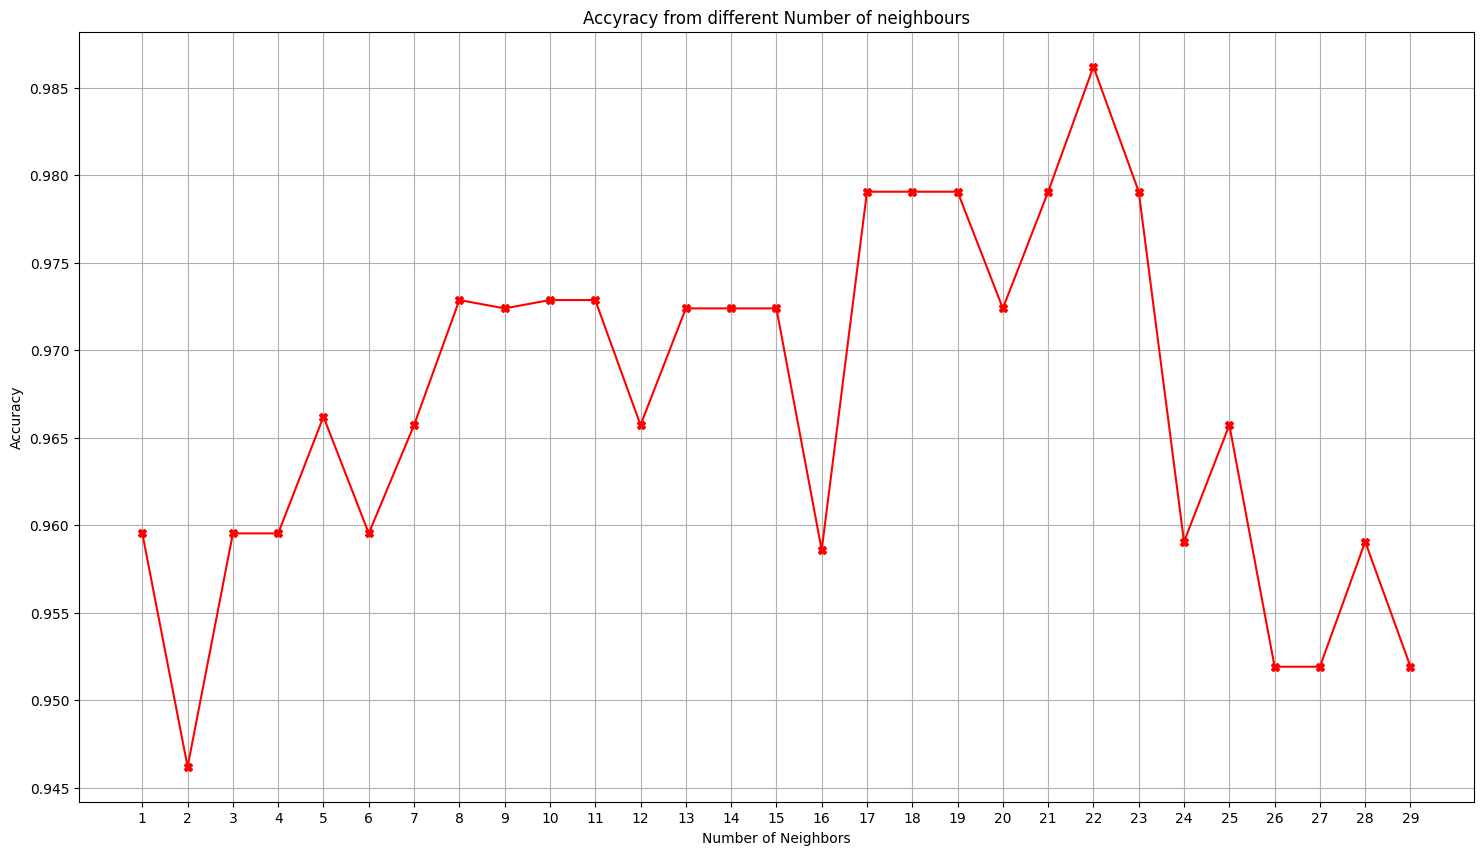

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Fri Dec 29 00:04:40 2023

@author: DiegoDePablo
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iris.data') #direccion de TU csv, hay files de ejemplo en mi github
"""

#Exercise 2:  Classify the features with a nearest neighbours’ classifier:

from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import model_selection as mdl
from sklearn import neighbors
from sklearn.preprocessing import LabelEncoder


# data (as pandas dataframes)
label_encoder = LabelEncoder()
for column in df.select_dtypes(include='object').columns:
    df[column] = label_encoder.fit_transform(df[column])
    features = df.drop('Iris-setosa', axis=1) #print(df.columns)
targets = df['Iris-setosa']
# Split the dataset into training and test sets
features_train, features_test, target_train, target_test = train_test_split(features, targets,
test_size=0.10, random_state=50)
# Convertion to a numpy array format
arr_target = targets.values
arr_features = features.values

# 10-fold cross validation
skf = mdl.StratifiedKFold(n_splits=10, shuffle=True, random_state=50)

# Range of neighbors to try
rango = range(1, 30) #poner el numero maximos de vecinos que quieres

# Calculate accuracy scores for each number of neighbors
score = []

for ngb in rango:
    clf = neighbors.KNeighborsClassifier(n_neighbors=ngb)
    clf.fit(features_train, target_train)
    scores = mdl.cross_val_score(clf, arr_features, arr_target, cv=skf, scoring='accuracy')
    score.append(scores.mean())

# Find the best number of neighbors
best = rango[np.argmax(score)]
print("The best number of neighbors is:", best)

#  Plot the accuracy scores for different numbers of neighbors
plt.figure(figsize=(18, 10))
plt.plot(rango, score, marker='X', color='red')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('Accyracy from different Number of neighbours')
plt.xticks(rango)
plt.grid(True)
plt.show()

**Exercise 3:**  Classify the data with a decision tree classifier:
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html   

For this exercise, there are various approaches, from quantifying the data to manually assigning categories based on percentiles. To provide a comprehensive comparison, I've created two codes: one that prioritizes achieving reasonable accuracy and another that involves hyperparameter optimization and visualizing the optimal decision tree.

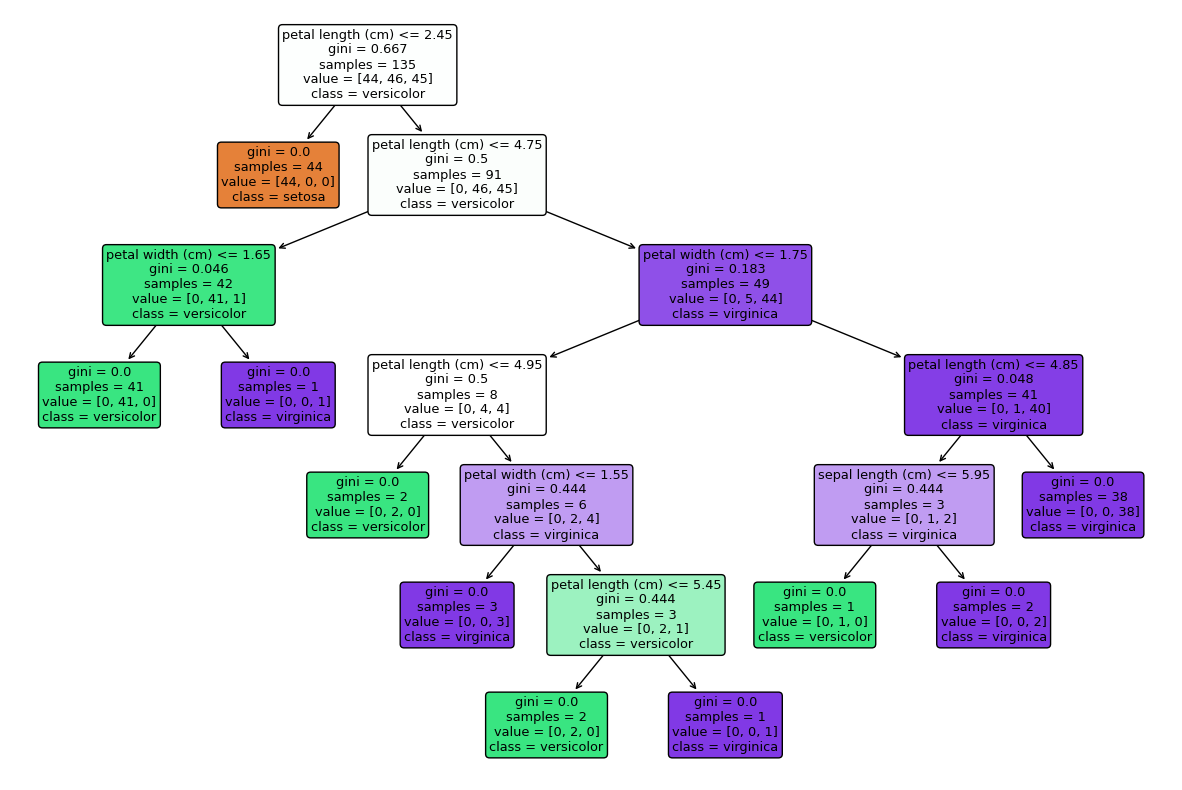

Accuracy: 1.0


In [14]:
# -*- coding: utf-8 -*-
"""
Created on Fri Dec 29 17:45:17 2023

@author: DiegoDePablo
"""

#from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

features = df.drop('target', axis=1)
targets = df['target']

# Split the dataset into training and test sets
features_train, features_test, target_train, target_test = train_test_split(features, targets, test_size=0.10, random_state=50)

# Create a Decision Tree model
model = DecisionTreeClassifier()

# Fit the model
model.fit(features_train, target_train)

# Create a figure
plt.figure(figsize=(15,10))

# Draw the decision tree
plot_tree(model, filled=True, rounded=True, class_names=iris.target_names.tolist(), feature_names=iris.feature_names)
# Show the figure
plt.show()

target_pred = model.predict(features_test)
print("Accuracy:", accuracy_score(target_test, target_pred))



involves hyperparameter optimization and visualizing the optimal decision tree.


----------You must find out the best hyperparameters and plot the best decision tree. ---------------

Best score:  0.9472527472527472
Best params:  {'min_samples_split': 6}


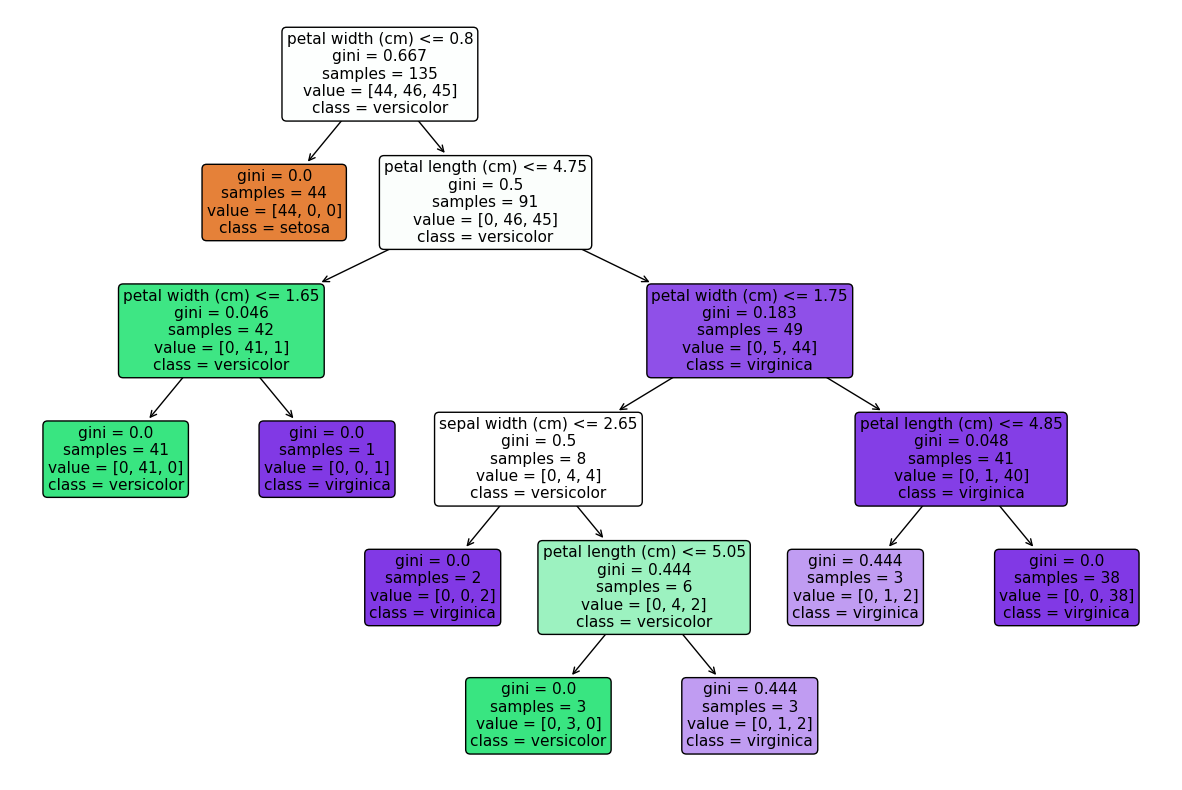

Accuracy: 0.9333333333333333


In [16]:
print("----------You must find out the best hyperparameters and plot the best decision tree. ---------------")


# New code for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Define the parameter values that should be searched
sample_split_range = list(range(2, 50))

# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(min_samples_split=sample_split_range)

# Instantiate the grid
grid = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')

# Fit the grid with data
grid.fit(features_train, target_train)

# View the complete results
#print(grid.cv_results_)

# Examine the best model
print("\nBest score: ", grid.best_score_)
print("Best params: ", grid.best_params_)

# Create a Decision Tree model with best parameters
best_model = DecisionTreeClassifier(min_samples_split=grid.best_params_['min_samples_split'])

# Fit the model
best_model.fit(features_train, target_train)

# Create a figure
plt.figure(figsize=(15,10))

# Draw the decision tree
plot_tree(best_model, filled=True, rounded=True, class_names=iris.target_names.tolist(), feature_names=iris.feature_names)

# Show the figure
plt.show()

target_pred = best_model.predict(features_test)
print("Accuracy:", accuracy_score(target_test, target_pred))


**Exercise 4:**  Classify the data with a Support Vector Machine classifier:
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
You must find out the best kernel and hyperparameters.


In [20]:
#4) Classify the data with a Support Vector Machine classifier:
    #You must find out the best kernel and hyperparameters.
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
#Prepare the features and target variable
#encode the target variable
label_encoder = LabelEncoder()
targets = label_encoder.fit_transform(targets)

#split the dataset in train and test (10% test)
features_train, features_test, targets_train, targets_test = train_test_split(features, targets, test_size=0.1, random_state=50)
svm_classifier = svm.SVC(random_state=50)

#param_grid is defined where the keys are the names of the hyperparameters
# be tuned and the values are the lists of values to try. dictionary that specifies which
#hyperparameters you’d like to tune for the Support Vector Machine (SVM) classifier.
param_grid = {
 'C': [0.1, 1, 10, 20],
 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

#do grid search:
grid_search = GridSearchCV(svm_classifier, param_grid, cv=10)
grid_search.fit(features_train, targets_train)
best = grid_search.best_params_
print("find out the best kernel and hyperparameters.:", best,"\n")

best_estimator = grid_search.best_estimator_
targets_pred = best_estimator.predict(features_test)

print("Confusion matrix:","\n",confusion_matrix(targets_test, targets_pred), "\n")

print("Accuracy:", accuracy_score(targets_test, targets_pred), "\n")

print("Classification Report; ", classification_report(targets_test, targets_pred))


find out the best kernel and hyperparameters.: {'C': 1, 'kernel': 'poly'} 

Confusion matrix: 
 [[6 0 0]
 [0 2 2]
 [0 0 5]] 

Accuracy: 0.8666666666666667 

Classification Report;                precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.50      0.67         4
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.83      0.83        15
weighted avg       0.90      0.87      0.86        15



**Exercise 5:**  Compare the performance of the previous classifiers. You must report several classification performance measures. You should show the Receiver Operating Characteristic plots for the compared models:
https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

You must find out the best kernel and hyperparameters.
Solution (python source code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


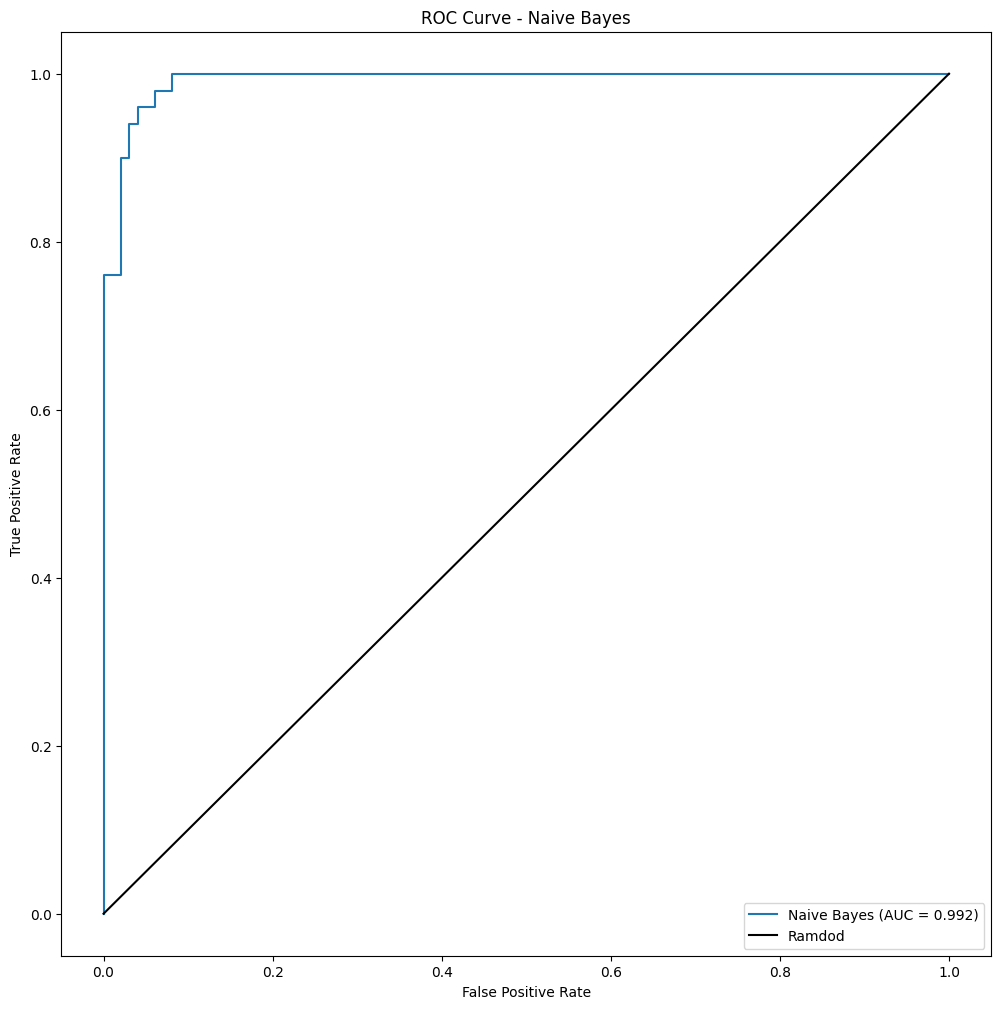

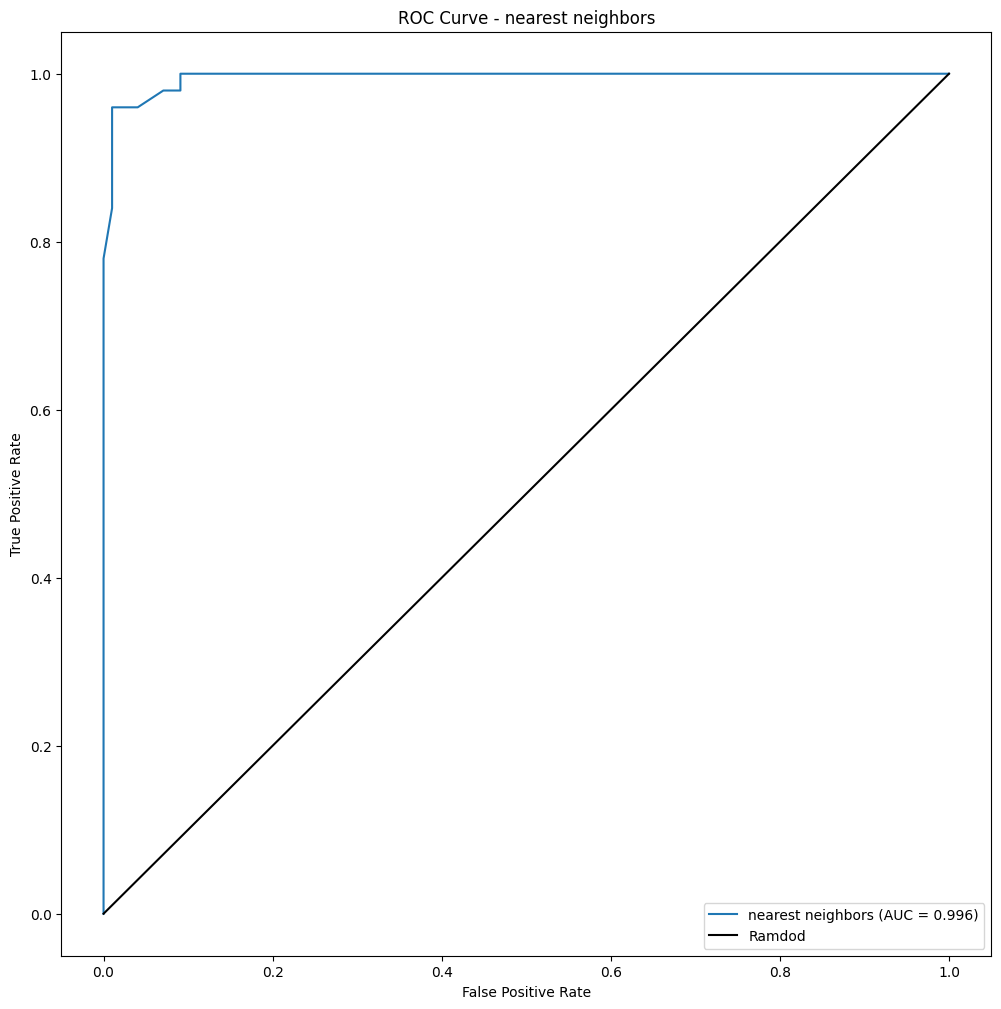

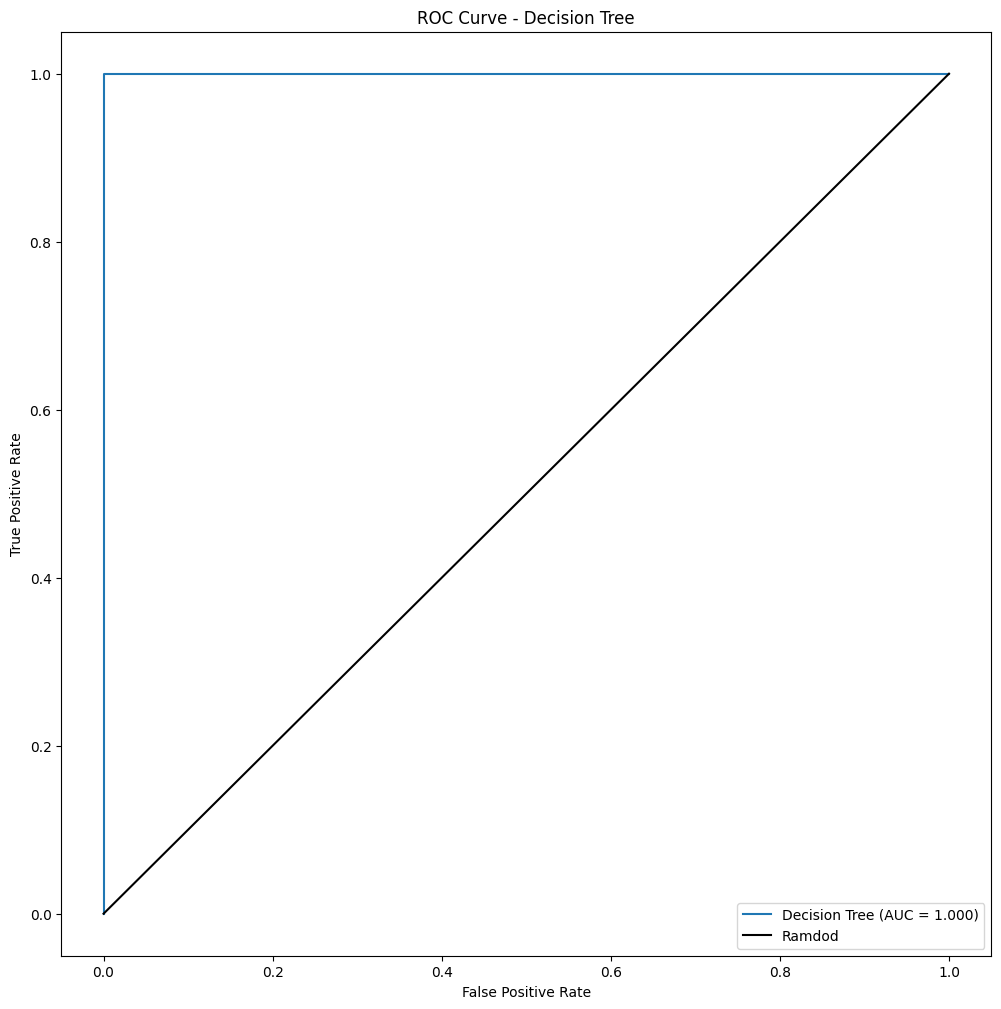

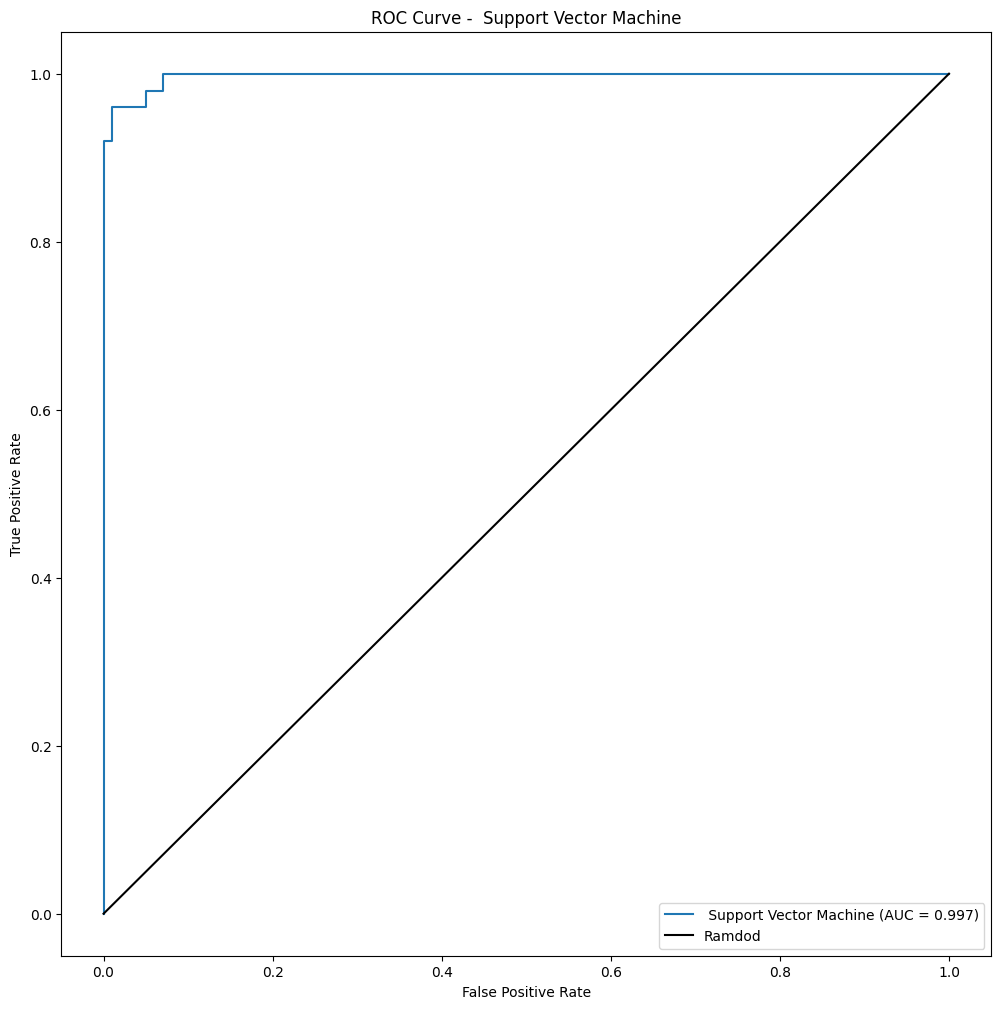

                     Model  Accuracy  Precision    Recall  F1 Score  \
0              Naive Bayes  0.959732   0.959732  0.959732  0.959732   
1        nearest neighbors  0.986577   0.986577  0.986577  0.986577   
2            Decision Tree  0.959732   0.959732  0.959732  0.959732   
3   Support Vector Machine  0.966443   0.966443  0.966443  0.966443   

   ROC AUC Score  
0       0.993535  
1       0.996768  
2       0.969899  
3       0.997441  


In [21]:
# 5. Compare the performance of the previous classifiers.
#You must report several classification performance measures.
#You should show the Receiver Operating Characteristic plots for the compared models:
import pandas as pd
from sklearn import model_selection as mdl
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import tree
from sklearn import svm
from sklearn import preprocessing

from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iris.data') #direccion de TU csv, hay files de ejemplo en mi github

label=preprocessing.LabelEncoder()
for column in df.select_dtypes(include='object').columns:
    df[column]=label.fit_transform(df[column])
target=df.iloc[:,-1] # Use the last column as the target variable
data=df.iloc[:,:-1] # Use all but the last column as the features

# models
nb_model = naive_bayes.GaussianNB()
knn_model = neighbors.KNeighborsClassifier(n_neighbors=22)
dtc_model = tree.DecisionTreeClassifier(random_state=50)
svm_model = svm.SVC(probability=True)

#models name:
models = [nb_model, knn_model, dtc_model, svm_model]
names = ['Naive Bayes', 'nearest neighbors', 'Decision Tree', ' Support Vector Machine']

#  10-fold cross-validation
cv = mdl.StratifiedKFold(n_splits=10, shuffle=True, random_state=50)

# Initialize lists
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_auc_scores = []

# Function to calculate ROC curve and AUC
def calculate_automatic(x, y, modelo):
    probabilities = model.predict_proba(data)
    # Calculate ROC curve with class probabilities
    fpr, tpr, _ = metrics.roc_curve(y, probabilities[:, 1], pos_label=1)

    roc_auc = metrics.auc(fpr, tpr)
    return fpr, tpr, roc_auc

# Iterate through models
for model, name in zip(models, names):
    model.fit(data, target) # Fit the model

    # Cross-validation
    predictions = mdl.cross_val_predict(model, data, target, cv=cv)

    # Calculate performance metrics
    accuracy = metrics.accuracy_score(target, predictions)

    precision = metrics.precision_score(target, predictions, average='micro')

    recall = metrics.recall_score(target, predictions, average='micro')

    f1 = metrics.f1_score(target, predictions, average='micro')

    # Calculate class probabilities
    probabilities = mdl.cross_val_predict(model, data, target, cv=cv, method='predict_proba')

    # Calculate ROC AUC score with class probabilities
    roc_auc = metrics.roc_auc_score(target, probabilities, multi_class='ovr')

    # Add values to lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)

    # Plot ROC curve
    fpr, tpr, roc_auc = calculate_automatic(data, target, model)
    plt.figure(figsize=(12, 12))
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], linestyle='-', color='black', label='Ramdod')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend()
    plt.show()


# Performance metrics
perf_metrics = pd.DataFrame({'Model': names,
                            'Accuracy': accuracies,
                            'Precision': precisions,
                            'Recall': recalls,
                            'F1 Score': f1_scores,
                            'ROC AUC Score': roc_auc_scores})
print(perf_metrics)

I apologize for the mess of the code, I had the bad decision to leave this for the last few days and an unexpected trip arose that I did not want to reject, I came on a trip to program a little out of my environment and schedule, which did not make me feel completely comfortable to perfect everything I wanted, I consider that the code is not polished and a lot of code could be saved or at least reused, but it is done like this to facilitate some captures